In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import statsmodels.api as sm
import pathlib

In [ ]:
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
df = pd.read_csv('/content/설문결과-Raw-Data.csv',sep=',')

In [ ]:
df.columns = ['인식매체','경험','인식','관심도','지식','구성원동의','환경','비용지불의사','정부지원정책','犬성별','중성화','犬나이','털길이','품종','색상','크기','성격','공고기간','입양희망여부','d1','d2','조사 나이대','성별','d5','d6']
df

,인식매체,경험,인식,관심도,지식,구성원동의,환경,비용지불의사,정부지원정책,犬성별,...,크기,성격,공고기간,입양희망여부,d1,d2,조사 나이대,성별,d5,d6
0,1,1,2,3,4,2,2,5,4,2,...,3,2,4,1,4,1,61,1,3,NaN
1,1,1,4,5,4,4,5,4,4,1,...,4,4,4,2,1,2,26,1,3,NaN
2,1,1,2,4,4,2,2,4,4,1,...,3,2,3,2,3,1,46,1,3,NaN
3,1,2,3,2,2,3,2,2,2,2,...,3,4,4,3,3,1,53,2,6,NaN
4,1,2,3,2,2,3,3,4,4,2,...,3,3,3,2,2,1,41,2,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,2,3,2,3,3,2,2,4,2,...,3,3,3,2,3,1,30,2,3,NaN
296,1,1,5,5,3,4,4,4,4,2,...,3,3,3,3,3,2,67,2,4,NaN
297,1,1,3,4,4,4,3,4,4,1,...,2,3,3,3,1,3,45,1,3,NaN
298,1,1,2,3,1,2,3,2,1,2,...,1,1,1,3,2,2,43,1,3,NaN


In [ ]:
clean_df = df.drop(['d1','d2','d5','d6'], axis = 1) # 라이프 스타일, 나이 등
real_df = clean_df
real_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   인식매체    300 non-null    int64
 1   경험      300 non-null    int64
 2   인식      300 non-null    int64
 3   관심도     300 non-null    int64
 4   지식      300 non-null    int64
 5   구성원동의   300 non-null    int64
 6   환경      300 non-null    int64
 7   비용지불의사  300 non-null    int64
 8   정부지원정책  300 non-null    int64
 9   犬성별     300 non-null    int64
 10  중성화     300 non-null    int64
 11  犬나이     300 non-null    int64
 12  털길이     300 non-null    int64
 13  품종      300 non-null    int64
 14  색상      300 non-null    int64
 15  크기      300 non-null    int64
 16  성격      300 non-null    int64
 17  공고기간    300 non-null    int64
 18  입양희망여부  300 non-null    int64
 19  조사 나이대  300 non-null    int64
 20  성별      300 non-null    int64
dtypes: int64(21)
memory usage: 49.3 KB


In [ ]:
idx = real_df[real_df["입양희망여부"] == 3].index     #  인덱스의 값이 저장됨
real_df.drop(idx , inplace=True) # 해당 인덱스를 제거함

In [ ]:
old_range = {'경험':{2:0}, '인식매체':{2:0}, '입양희망여부' :{2:0}, '성별' : {2:0}, '犬성별' : {2:0}} # 0 입양안한다, 1 한다,    성별 - 0 = 여자, 1 = 남자 , 인식매체 0 오프라인, 1 온라인,  경험 0 아니오, 1 예
logi_df = real_df.replace(old_range)
logi_df

,인식매체,경험,인식,관심도,지식,구성원동의,환경,비용지불의사,정부지원정책,犬성별,...,犬나이,털길이,품종,색상,크기,성격,공고기간,입양희망여부,조사 나이대,성별
0,1,1,2,3,4,2,2,5,4,0,...,4,4,4,4,3,2,4,1,61,1
1,1,1,4,5,4,4,5,4,4,1,...,4,3,4,3,4,4,4,0,26,1
2,1,1,2,4,4,2,2,4,4,1,...,3,3,4,3,3,2,3,0,46,1
4,1,0,3,2,2,3,3,4,4,0,...,3,3,4,4,3,3,3,0,41,0
5,1,1,4,5,4,5,3,5,4,1,...,3,2,4,4,2,3,5,1,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,1,1,3,4,4,4,4,5,5,1,...,4,3,4,3,4,3,4,1,52,1
291,1,0,2,3,3,2,2,2,4,1,...,3,3,3,3,3,2,3,0,26,0
292,1,1,2,3,3,4,4,3,3,1,...,4,4,5,5,4,3,4,1,33,1
295,1,0,3,2,3,3,2,2,4,0,...,3,3,4,4,3,3,3,0,30,0


# 로지스틱 회귀분석 (종속변수 = 입양희망여부)

In [ ]:
logi_df.describe().T #입양 희망여부 평균 0.497 => 결과변수 균형잡힘

,count,mean,std,min,25%,50%,75%,max
인식매체,204.0,0.901961,0.298099,0.0,1.00,1.0,1.0,1.0
경험,204.0,0.720588,0.449814,0.0,0.00,1.0,1.0,1.0
인식,204.0,3.299020,0.964288,1.0,3.00,3.0,4.0,5.0
관심도,204.0,3.411765,1.126072,1.0,3.00,4.0,4.0,5.0
지식,204.0,3.117647,0.995498,1.0,2.00,3.0,4.0,5.0
구성원동의,204.0,3.181373,1.162402,1.0,2.00,3.0,4.0,5.0
환경,204.0,2.774510,1.152482,1.0,2.00,3.0,4.0,5.0
비용지불의사,204.0,3.147059,1.198497,1.0,2.00,3.0,4.0,5.0
정부지원정책,204.0,3.651961,1.069711,1.0,3.00,4.0,4.0,5.0
犬성별,204.0,0.475490,0.500627,0.0,0.00,0.0,1.0,1.0


In [ ]:
logi_df.max()

인식매체       1
경험         1
인식         5
관심도        5
지식         5
구성원동의      5
환경         5
비용지불의사     5
정부지원정책     5
犬성별        1
중성화        5
犬나이        5
털길이        5
품종         5
색상         5
크기         5
성격         5
공고기간       5
입양희망여부     1
조사 나이대    68
성별         1
dtype: int64

In [ ]:
logi_df["입양희망여부"].value_counts() # 0 입양x, 1 입양 o

1    102
0    102
Name: 입양희망여부, dtype: int64

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


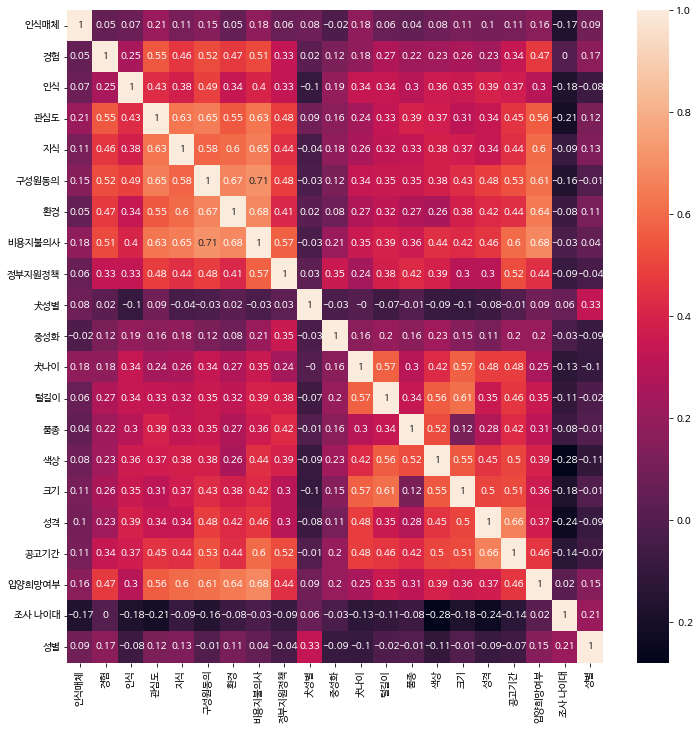

In [ ]:
plt.figure(figsize=(12,12))

corr_=logi_df.corr().round(2)
sns.heatmap(corr_, annot=True)
plt.show()

In [ ]:
x = logi_df.drop('입양희망여부', axis=1)  #변수 지정
y = logi_df['입양희망여부']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
log = LogisticRegression() #로지스틱 회귀분석 시행

log.fit(x_train, y_train) #모델의 정확도 확인
print('학습용 데이터셋 정확도 : %.2f' % log.score(x_train, y_train))
print('검증용 데이터셋 정확도 : %.2f' % log.score(x_test, y_test))

학습용 데이터셋 정확도 : 0.90
검증용 데이터셋 정확도 : 0.86


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import classification_report
y_pred=log.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.87      0.83      0.85        24

    accuracy                           0.86        51
   macro avg       0.86      0.86      0.86        51
weighted avg       0.86      0.86      0.86        51



In [ ]:
logit = sm.Logit(logi_df[['입양희망여부']],x) #로지스틱 회귀분석 시행
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.398215
         Iterations 7


In [ ]:
result1 = result.summary()

In [ ]:
result1

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 입양희망여부   No. Observations:                  204
Model:                          Logit   Df Residuals:                      184
Method:                           MLE   Df Model:                           19
Date:                Mon, 12 Dec 2022   Pseudo R-squ.:                  0.4255
Time:                        06:36:12   Log-Likelihood:                -81.236
converged:                       True   LL-Null:                       -141.40
Covariance Type:            nonrobust   LLR p-value:                 9.614e-17
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
인식매체          -0.9384      0.687     -1.366      0.172      -2.285       0.408
경험             0.5971      0.575      1.039      0.299      -0.529       1.723
인식            -0.5529      0.288     -1.922      0.055      -1.117       0.011
관심도           -0.0885      0.301     -0.294      0.769      -0.679       0.502
지식             0.4533      0.299      1.516      0.130      -0.133       1.039
구성원동의          0.5132      0.316      1.623      0.105      -0.107       1.133
환경             0.5801      0.267      2.174      0.030       0.057       1.103
비용지불의사         1.3106      0.328      3.997      0.000       0.668       1.953
정부지원정책        -0.1451      0.273     -0.531      0.596      -0.681       0.391
犬성별            0.3516      0.455      0.773      0.440      -0.540       1.243
중성화           -0.2704      0.245     -1.104      0.270      -0.750       0.210
犬나이           -0.4158      0.350     -1.188      0.235      -1.102       0.270
털길이            0.2606      0.334      0.781      0.435      -0.393       0.914
품종            -0.4636      0.350     -1.324      0.185      -1.150       0.223
색상             0.1608      0.340      0.473      0.636      -0.505       0.827
크기            -0.1551      0.291     -0.533      0.594      -0.725       0.415
성격            -0.2704      0.327     -0.828      0.408      -0.911       0.370
공고기간           0.0251      0.364      0.069      0.945      -0.689       0.739
조사 나이대        -0.0523      0.019     -2.803      0.005      -0.089      -0.016
성별             0.2209      0.488      0.453      0.651      -0.735       1.177
==============================================================================
"""

In [ ]:
np.exp(result.params) #오즈비가 1 기준으로 큰지 작은지 파악 1과 값이 수렴한다면 영향 x

인식매체      0.391267
경험        1.816803
인식        0.575275
관심도       0.915296
지식        1.573461
구성원동의     1.670608
환경        1.786233
비용지불의사    3.708559
정부지원정책    0.864919
犬성별       1.421401
중성화       0.763058
犬나이       0.659795
털길이       1.297665
품종        0.628984
색상        1.174440
크기        0.856357
성격        0.763066
공고기간      1.025380
조사 나이대    0.949022
성별        1.247144
dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
df = logi_df
y_col = ["입양희망여부"]
x_cols = ['인식매체','경험','인식','관심도','지식','구성원동의','환경','비용지불의사','정부지원정책','犬성별','중성화','犬나이','털길이','품종','색상','크기','성격','공고기간']

In [ ]:
X = df[x_cols].values
y = df[y_col].values
reg = LinearRegression().fit(X, y)

In [ ]:
model = sm.OLS.from_formula("입양희망여부 ~ 인식매체+경험+인식+관심도+지식+구성원동의+환경+비용지불의사+정부지원정책+犬성별+중성화+犬나이+털길이+품종+색상+크기+성격+공고기간", data=df)
result = model.fit()
result.predict(df[x_cols])
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 입양희망여부   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     14.63
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           8.03e-27
Time:                        06:36:12   Log-Likelihood:                -57.770
No. Observations:                 204   AIC:                             153.5
Df Residuals:                     185   BIC:                             216.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9436      0.166     -5.685      0.0

In [ ]:
pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import researchpy as rp
import statsmodels.api as sm

In [ ]:
rp.summary_cont(logi_df[['인식매체','경험','인식','관심도','지식','구성원동의','환경','비용지불의사','정부지원정책','犬성별','중성화','犬나이','털길이','품종','색상','크기','성격','공고기간']])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,인식매체,204.0,0.9020,0.2981,0.0209,0.8608,0.9431
1,경험,204.0,0.7206,0.4498,0.0315,0.6585,0.7827
2,인식,204.0,3.2990,0.9643,0.0675,3.1659,3.4321
3,관심도,204.0,3.4118,1.1261,0.0788,3.2563,3.5672
4,지식,204.0,3.1176,0.9955,0.0697,2.9802,3.2551
5,구성원동의,204.0,3.1814,1.1624,0.0814,3.0209,3.3418
6,환경,204.0,2.7745,1.1525,0.0807,2.6154,2.9336
7,비용지불의사,204.0,3.1471,1.1985,0.0839,2.9816,3.3125
8,정부지원정책,204.0,3.6520,1.0697,0.0749,3.5043,3.7996
9,犬성별,204.0,0.4755,0.5006,0.0351,0.4064,0.5446


In [ ]:
rp.summary_cat(logi_df[['인식매체','경험','인식','관심도','지식','구성원동의','환경','비용지불의사','정부지원정책','犬성별','중성화','犬나이','털길이','품종','색상','크기','성격','공고기간']])

,Variable,Outcome,Count,Percent
0,인식매체,1,184,90.20
1,,0,20,9.80
2,경험,1,147,72.06
3,,0,57,27.94
4,인식,3,81,39.71
...,...,...,...,...
76,공고기간,3,85,41.67
77,,4,63,30.88
78,,2,34,16.67
79,,5,15,7.35


In [ ]:
import statsmodels.formula.api as smf

In [ ]:
smf.logit("입양희망여부 ~ 인식매체+경험+인식+관심도+지식+구성원동의+환경+비용지불의사+정부지원정책+犬성별+중성화+犬나이+털길이+품종+색상+크기+성격+공고기간",
        data = logi_df).fit()

Optimization terminated successfully.
         Current function value: 0.259433
         Iterations 8


In [ ]:
model = smf.logit("입양희망여부 ~ 인식매체+경험+인식+관심도+지식+구성원동의+환경+비용지불의사+정부지원정책+犬성별+중성화+犬나이+털길이+품종+색상+크기+성격+공고기간", data = logi_df).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.259433
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 입양희망여부   No. Observations:                  204
Model:                          Logit   Df Residuals:                      185
Method:                           MLE   Df Model:                           18
Date:                Mon, 12 Dec 2022   Pseudo R-squ.:                  0.6257
Time:                        06:36:15   Log-Likelihood:                -52.924
converged:                       True   LL-Null:                       -141.40
Covariance Type:            nonrobust   LLR p-value:                 3.841e-28
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.6667      3.247     -5.441      0.000     -24.030     -11.303
인식매체           1.6207      1.159      1.399      0.162      -0.650       3.891
경험             0.5914      0.737      0.803      0.422      -0.852       2.035
인식            -0.2770      0.357     -0.775      0.438      -0.977       0.423
관심도            0.3143      0.415      0.757      0.449      -0.500       1.129
지식             0.7455      0.397      1.879      0.060      -0.032       1.523
구성원동의          0.5838      0.381      1.532      0.126      -0.163       1.331
환경             1.1554      0.364      3.170      0.002       0.441       1.870
비용지불의사         1.0541      0.392      2.689      0.007       0.286       1.822
정부지원정책        -0.0679      0.328     -0.207      0.836      -0.712       0.576
犬성별            0.8725      0.563      1.550      0.121      -0.231       1.976
중성화            0.1882      0.336      0.561      0.575      -0.470       0.846
犬나이           -0.9159      0.478     -1.917      0.055      -1.852       0.020
털길이            0.7655      0.473      1.618      0.106      -0.162       1.693
품종             0.3200      0.385      0.830      0.406      -0.435       1.075
색상             0.7277      0.425      1.713      0.087      -0.105       1.561
크기            -0.1020      0.396     -0.258      0.797      -0.878       0.674
성격             0.0209      0.385      0.054      0.957      -0.734       0.776
공고기간           0.2084      0.442      0.471      0.638      -0.659       1.075
==============================================================================
"""